In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,742080.0,334440.0,87240.0,2880.0,4320.0,0.0,0.0,0.0,0.0,0.0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,606360.0,501120.0,158280.0,2760.0,3360.0,0.0,0.0,0.0,0.0,0.0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,881040.0,557040.0,128640.0,2280.0,3000.0,0.0,0.0,0.0,0.0,0.0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,677280.0,502320.0,112080.0,1800.0,2760.0,0.0,0.0,0.0,0.0,0.0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259560.0,138840.0,45000.0,2520.0,2880.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset1.iloc[0,2:]

설비용량(MW)       1.628
1                0.0
2                0.0
3                0.0
4                0.0
5                0.0
6                0.0
7                0.0
8              840.0
9            23880.0
10          251640.0
11          308640.0
12          480000.0
13          921000.0
14          886920.0
15          742080.0
16          334440.0
17           87240.0
18            2880.0
19            4320.0
20               0.0
21               0.0
22               0.0
23               0.0
24               0.0
Name: 0, dtype: object

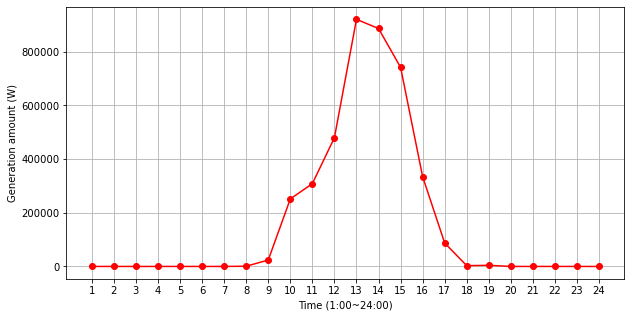

In [4]:
plt.figure(figsize=(10,5))
plt.plot(dataset1.iloc[0,3:], marker='o', c='r')
plt.grid(True)
plt.xlabel('Time (1:00~24:00)')
plt.ylabel('Generation amount (W)')
plt.show()

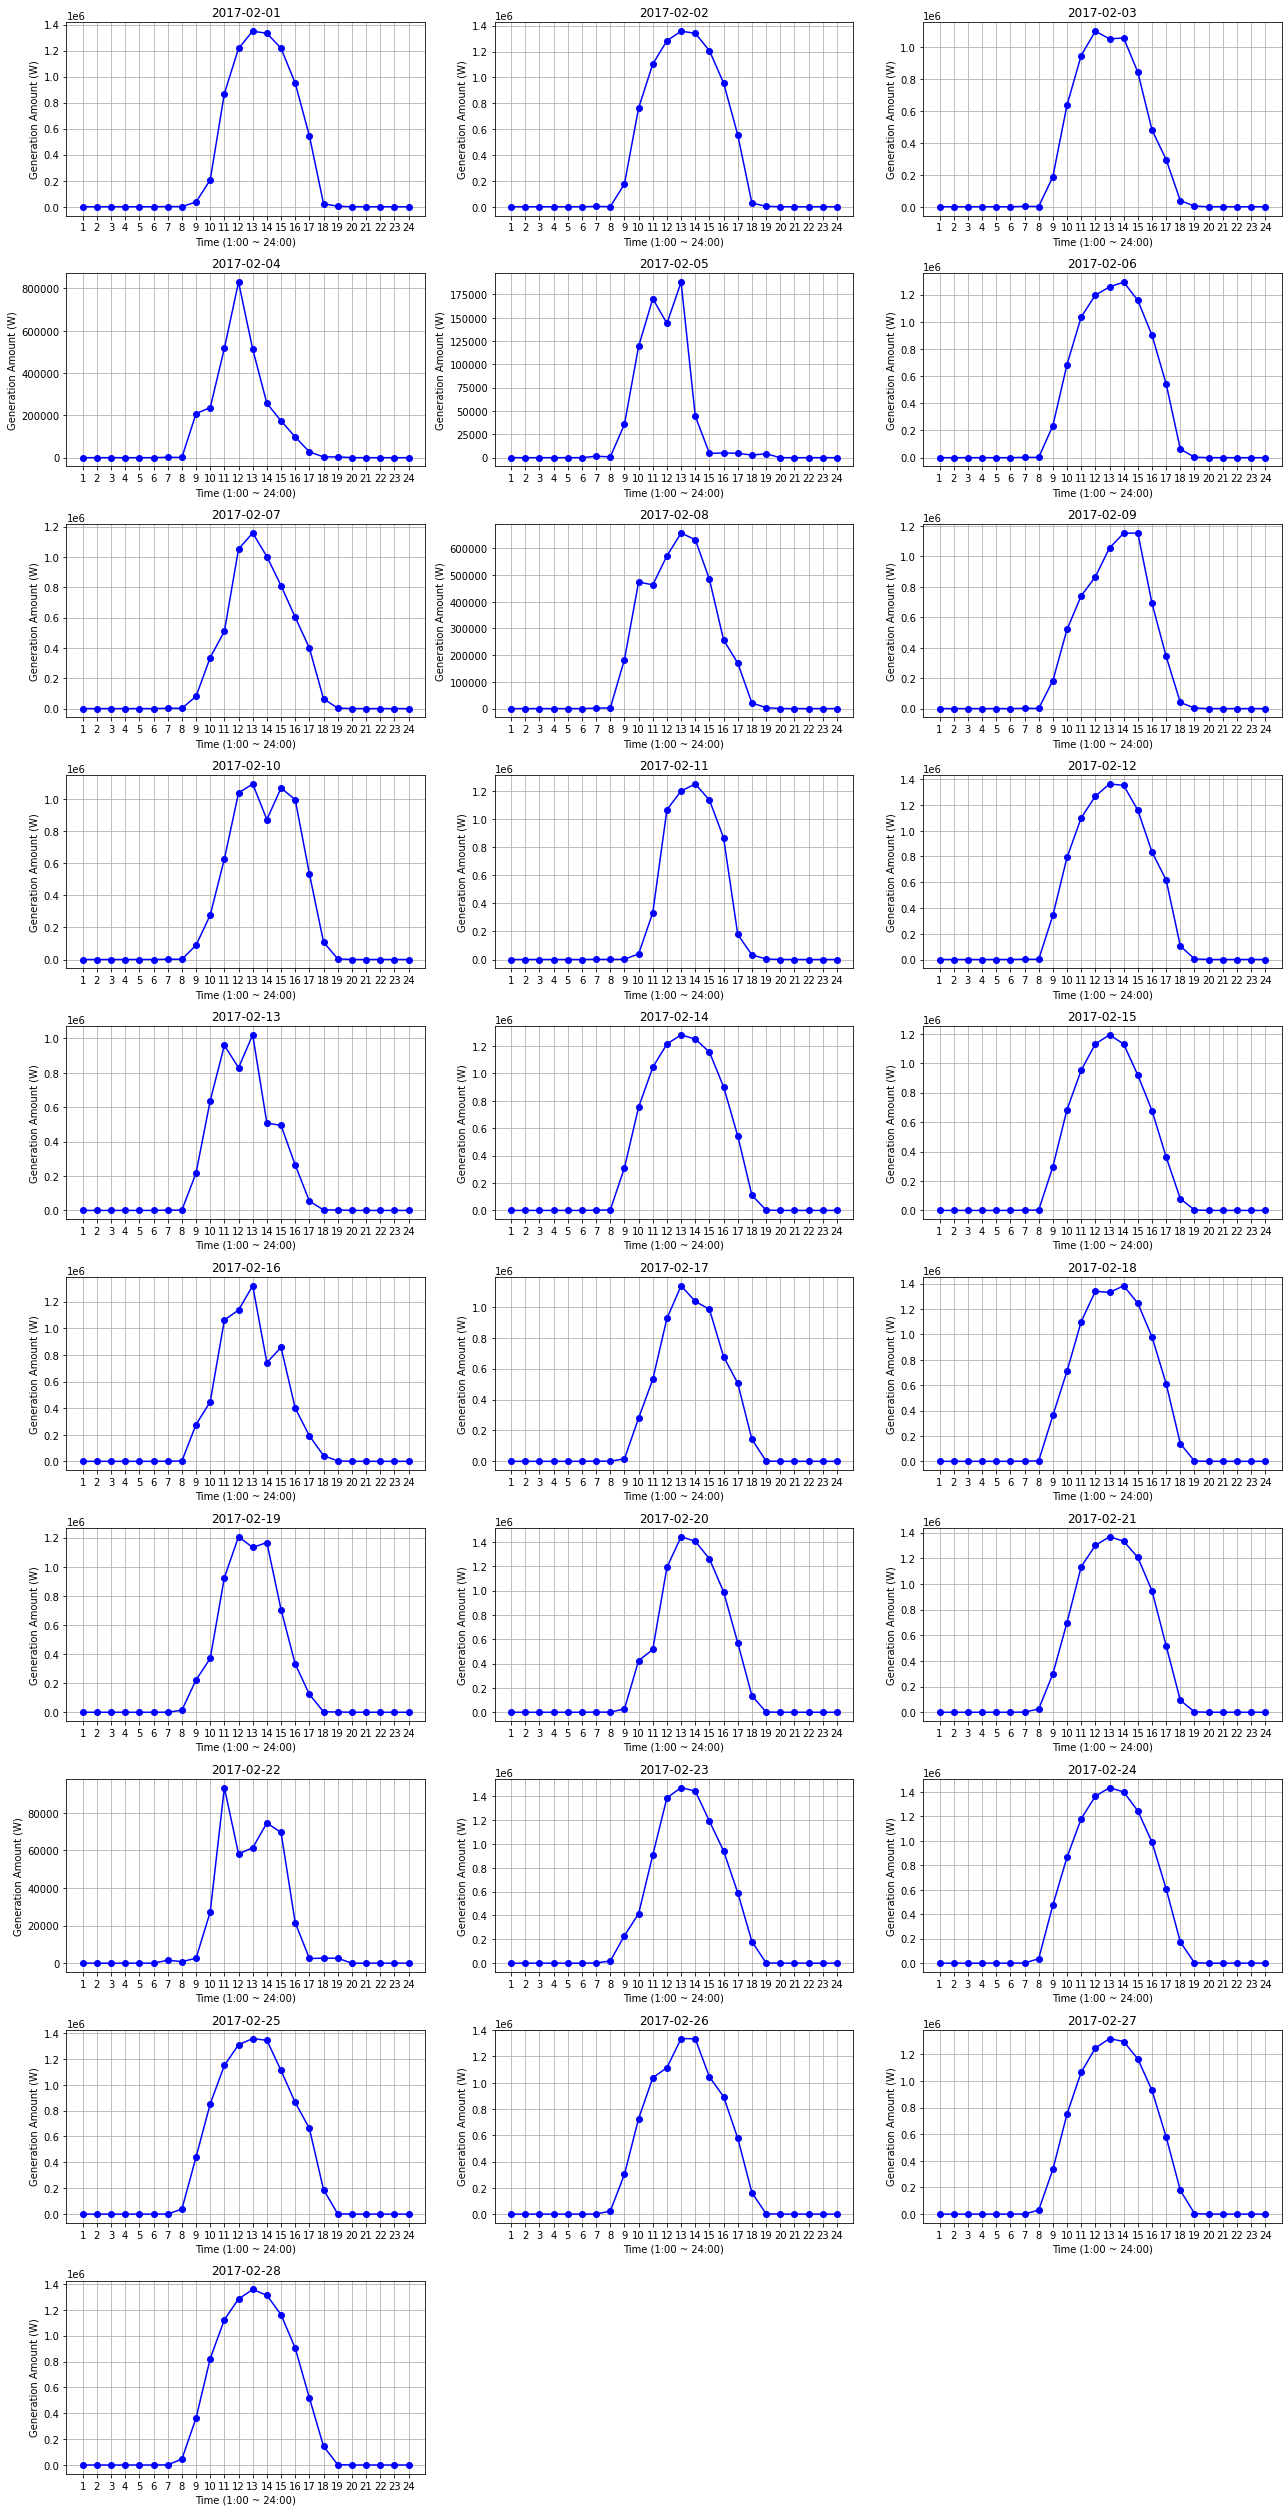

In [32]:
plt.figure(figsize=(18, 35))
for i in range(31,59):
    plt.subplot(10, 3, i-30)
    plt.plot(dataset1.iloc[i,3:], 'o-', c='b')
    plt.title(dataset1.iloc[i,1])
    plt.ylabel('Generation Amount (W)')
    plt.xlabel('Time (1:00 ~ 24:00)')
    plt.grid(True)

plt.tight_layout()
plt.show()

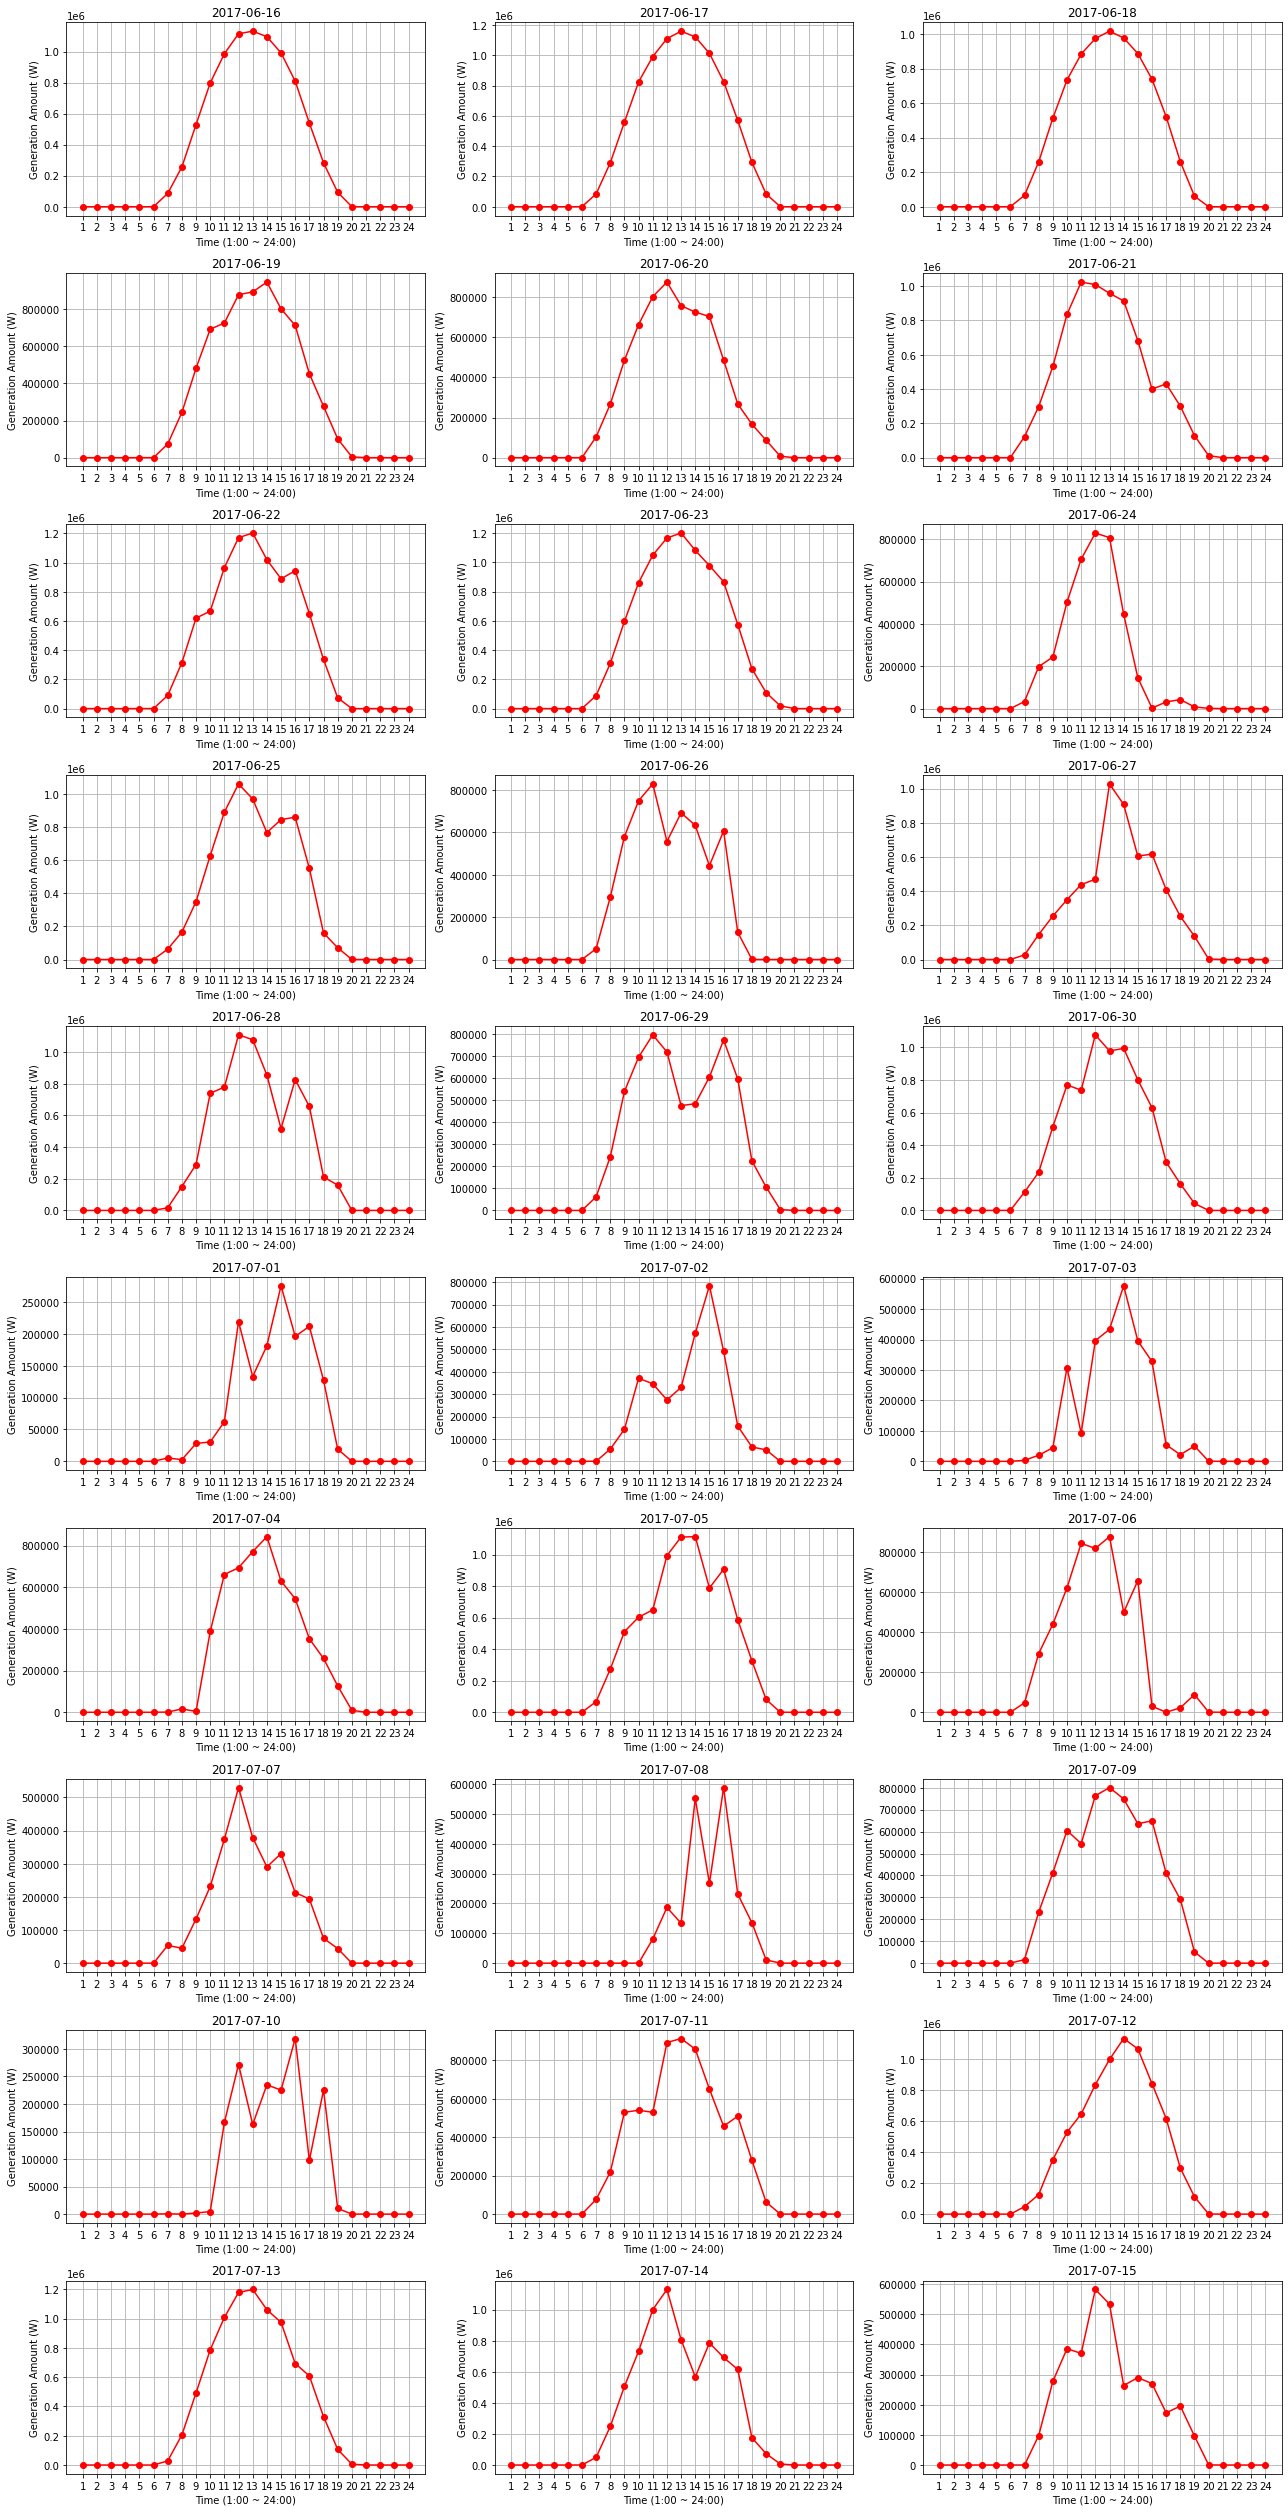

In [6]:
plt.figure(figsize=(18, 35))
for i in range(161,191):
    plt.subplot(10, 3, i-160)
    plt.plot(dataset1.iloc[i,3:], 'o-', c='r')
    plt.title(dataset1.iloc[i,1])
    plt.ylabel('Generation Amount (W)')
    plt.xlabel('Time (1:00 ~ 24:00)')
    plt.grid(True)

plt.tight_layout()
plt.show()

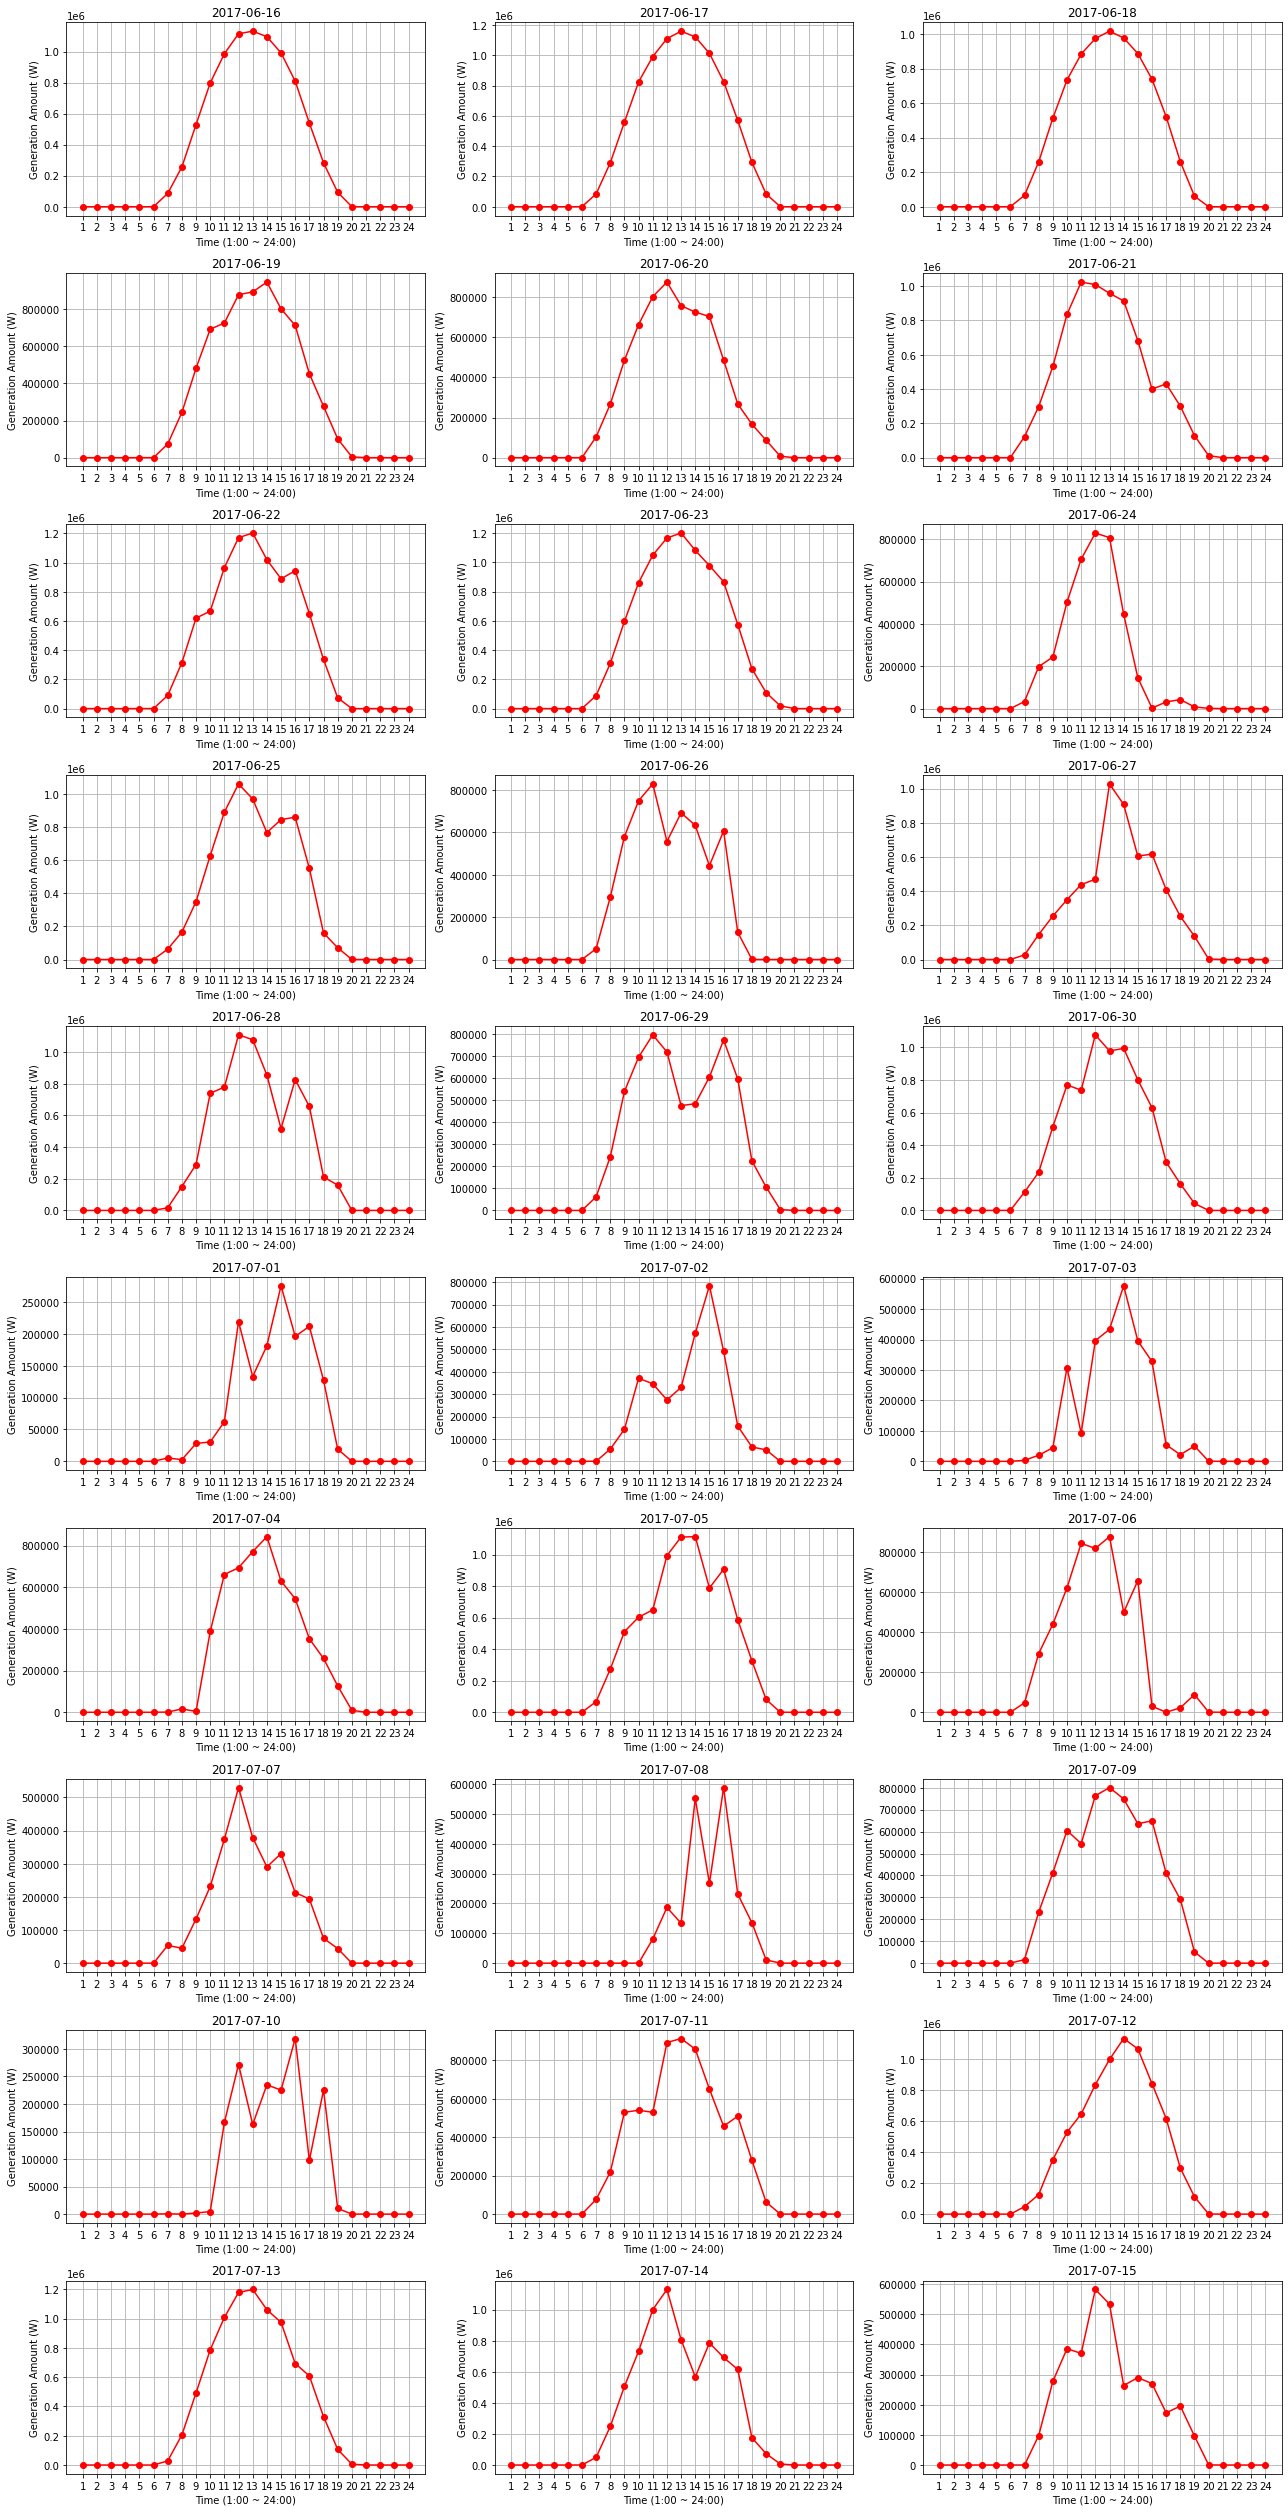

In [7]:
plt.figure(figsize=(18, 35))
for i in range(161,191):
    plt.subplot(10, 3, i-160)
    plt.plot(dataset1.iloc[i,3:], 'o-', c='r')
    plt.title(dataset1.iloc[i,1])
    plt.ylabel('Generation Amount (W)')
    plt.xlabel('Time (1:00 ~ 24:00)')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Non-IID 기준
1. 데이터 셋의 양의 일치 => Nan value
2. 데이터 셋의 분포의 분산
3. 데이터 셋의 시계열 => 


# Amount of Dataset

In [10]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  33 5 1
After :  0 0 0


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

month_date_2017 = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_date_2018 = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_date_2019 = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

dataset1_month_2017, dataset2_month_2017, dataset3_month_2017 = [], [], []
dataset1_month_2018, dataset2_month_2018, dataset3_month_2018 = [], [], []
dataset1_month_2019, dataset2_month_2019, dataset3_month_2019 = [], [], []

for year in range(7,10):
    for location in range(1,4):
        for i in range(13):
            lst_24H = []
            for hour in range(3,27):
                tmp = []
                for j in np.arange(np.sum(globals()['month_date_201{}'.format(year)][:i]),np.sum(globals()['month_date_201{}'.format(year)][:i+1])):
                    tmp.append(globals()['dataset{}'.format(location)].iloc[j,hour])
                lst_24H.append(np.mean(tmp))
            globals()['dataset{}_month_201{}'.format(location, year)].append(lst_24H)
    

for year in range(7,10):
    for location in range(1,4):
        globals()['dataset{}_month_201{}'.format(location,year)] = globals()['dataset{}_month_201{}'.format(location,year)][1:13]
        print('dataset 201',year,' + ',location,' ',len(globals()['dataset{}_month_201{}'.format(location,year)]))
        for i in range(12):
            print(len(globals()['dataset{}_month_201{}'.format(location,year)][i]))

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dataset 201 7  +  1   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 7  +  2   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 7  +  3   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 8  +  1   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 8  +  2   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 8  +  3   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 9  +  1   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 9  +  2   12
24
24
24
24
24
24
24
24
24
24
24
24
dataset 201 9  +  3   12
24
24
24
24
24
24
24
24
24
24
24
24


## Monthly Average

In [21]:
max_month, maximum = [], []

for year in range(7,10):
    for location in range(1,4):
        tmp = []
        for i in range(12):
            val = np.max(globals()['dataset{}_month_201{}'.format(location, year)][i][:])
            idx = np.argmax(globals()['dataset{}_month_201{}'.format(location, year)][i][:])
            maximum.append(['201'+str(year), 'Dataset'+str(location), idx, val])
            tmp.append(idx)
        max_month.append(tmp)
maximum

[['2017', 'Dataset1', 12, 782090.3225806452],
 ['2017', 'Dataset1', 12, 1135941.4285714286],
 ['2017', 'Dataset1', 12, 1130907.0967741935],
 ['2017', 'Dataset1', 12, 962400.0],
 ['2017', 'Dataset1', 12, 1079868.3870967743],
 ['2017', 'Dataset1', 12, 870704.0],
 ['2017', 'Dataset1', 12, 739258.0645161291],
 ['2017', 'Dataset1', 13, 746976.7741935484],
 ['2017', 'Dataset1', 12, 952972.0],
 ['2017', 'Dataset1', 12, 921565.1612903225],
 ['2017', 'Dataset1', 12, 907056.0],
 ['2017', 'Dataset1', 12, 869547.0967741936],
 ['2017', 'Dataset2', 12, 723445.1612903225],
 ['2017', 'Dataset2', 11, 971957.1428571428],
 ['2017', 'Dataset2', 12, 1029948.3870967742],
 ['2017', 'Dataset2', 11, 990240.0],
 ['2017', 'Dataset2', 12, 988529.0322580645],
 ['2017', 'Dataset2', 12, 880920.0],
 ['2017', 'Dataset2', 13, 560709.6774193548],
 ['2017', 'Dataset2', 11, 616025.8064516129],
 ['2017', 'Dataset2', 11, 903640.0],
 ['2017', 'Dataset2', 11, 860438.7096774194],
 ['2017', 'Dataset2', 12, 811680.0],
 ['2017', 

In [30]:
lst, i = [], 0

for i in range(len(max_month)):
    lst.append(np.argmax(max_month[i][:])+1)
        
lst

[2, 3, 3, 2, 3, 3, 2, 3, 3]

In [33]:
np.mean(dataset1.iloc[31:59,3:]), np.mean(dataset1.iloc[59:90,3:]), np.mean(dataset1.iloc[90:120,3:])

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(1     0.000000e+00
 2     0.000000e+00
 3     0.000000e+00
 4     0.000000e+00
 5     0.000000e+00
 6     0.000000e+00
 7     1.530000e+03
 8     9.347143e+03
 9     2.120829e+05
 10    5.199857e+05
 11    8.284671e+05
 12    1.059759e+06
 13    1.135941e+06
 14    1.062266e+06
 15    9.367329e+05
 16    6.911057e+05
 17    4.011343e+05
 18    8.258143e+04
 19    3.175714e+03
 20    0.000000e+00
 21    0.000000e+00
 22    0.000000e+00
 23    0.000000e+00
 24    0.000000e+00
 dtype: float64,
 1     0.000000e+00
 2     0.000000e+00
 3     0.000000e+00
 4     0.000000e+00
 5     0.000000e+00
 6     0.000000e+00
 7     1.157419e+03
 8     7.947484e+04
 9     3.551845e+05
 10    6.578555e+05
 11    9.095032e+05
 12    1.062240e+06
 13    1.130907e+06
 14    1.068132e+06
 15    9.568065e+05
 16    7.306955e+05
 17    4.443755e+05
 18    1.692271e+05
 19    6.143226e+03
 20    0.000000e+00
 21    0.000000e+00
 22    0.000000e+00
 23    0.000000e+00
 24    0.000000e+00
 dtype: float64,
 1    

# 월별 태양광 발전량, 2017, 세종

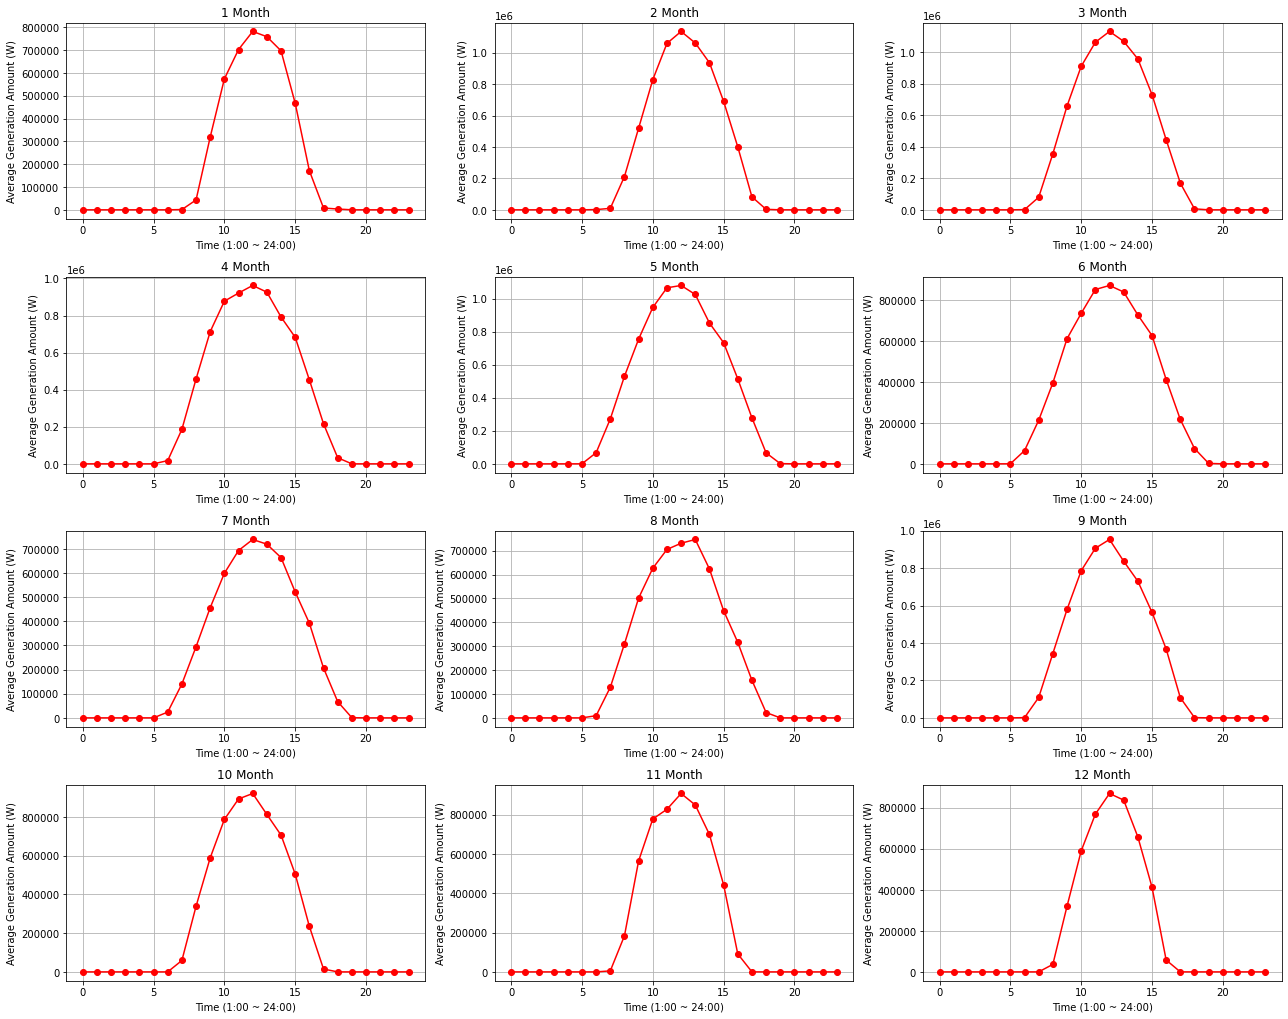

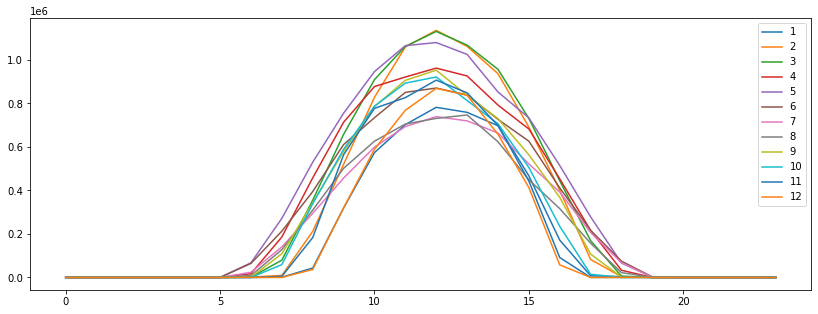

In [43]:
plt.figure(figsize=(18, 35))

for i in range(12):
    plt.subplot(10, 3, i+1)
    plt.plot(dataset1_month_2017[i], 'o-', c='r')
    plt.title(str(i+1) +' Month')
    plt.ylabel('Average Generation Amount (W)')
    plt.xlabel('Time (1:00 ~ 24:00)')
    plt.grid(True)

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 5))
for i in range(12):
    plt.plot(dataset1_month_2017[i])
plt.legend(np.arange(1,13))
plt.show()

In [ ]:

ts = df.timeseries
result = seasonal_decompose(ts, model='additive')


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

# 2. Distribution

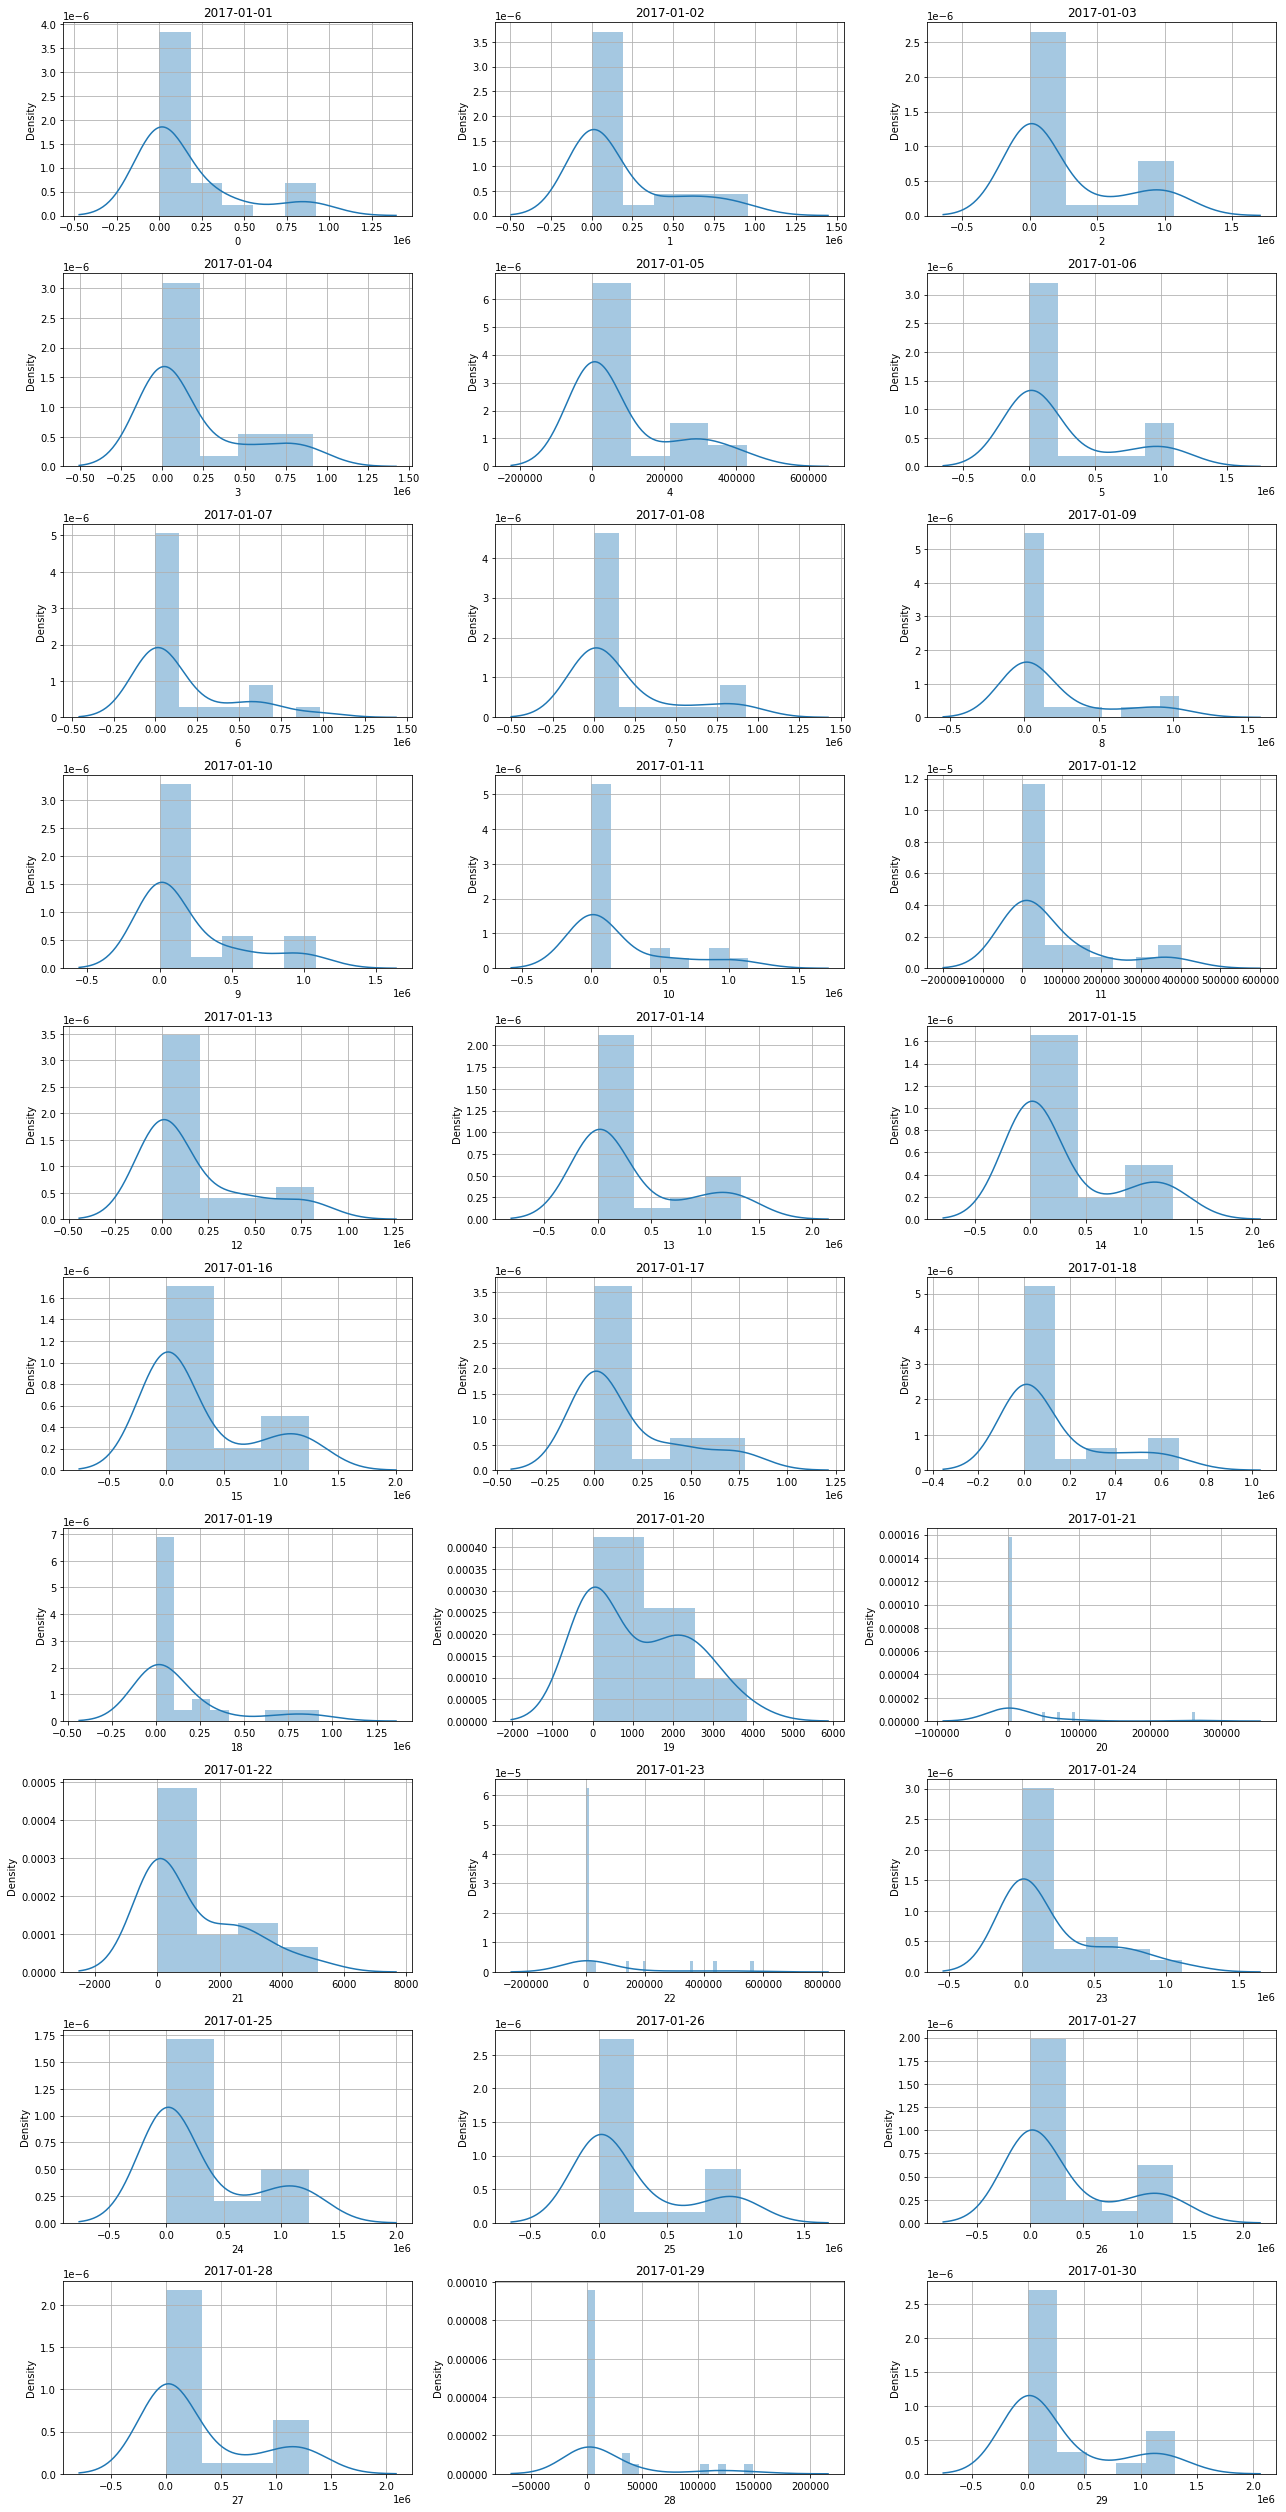

In [50]:
plt.figure(figsize=(18, 35))

for i in range(1,31):
    plt.subplot(10, 3, i)
    sns.distplot(dataset1.iloc[i-1,3:])
    plt.title(dataset1.iloc[i-1,1])
    plt.grid(True)

plt.tight_layout()
plt.show()

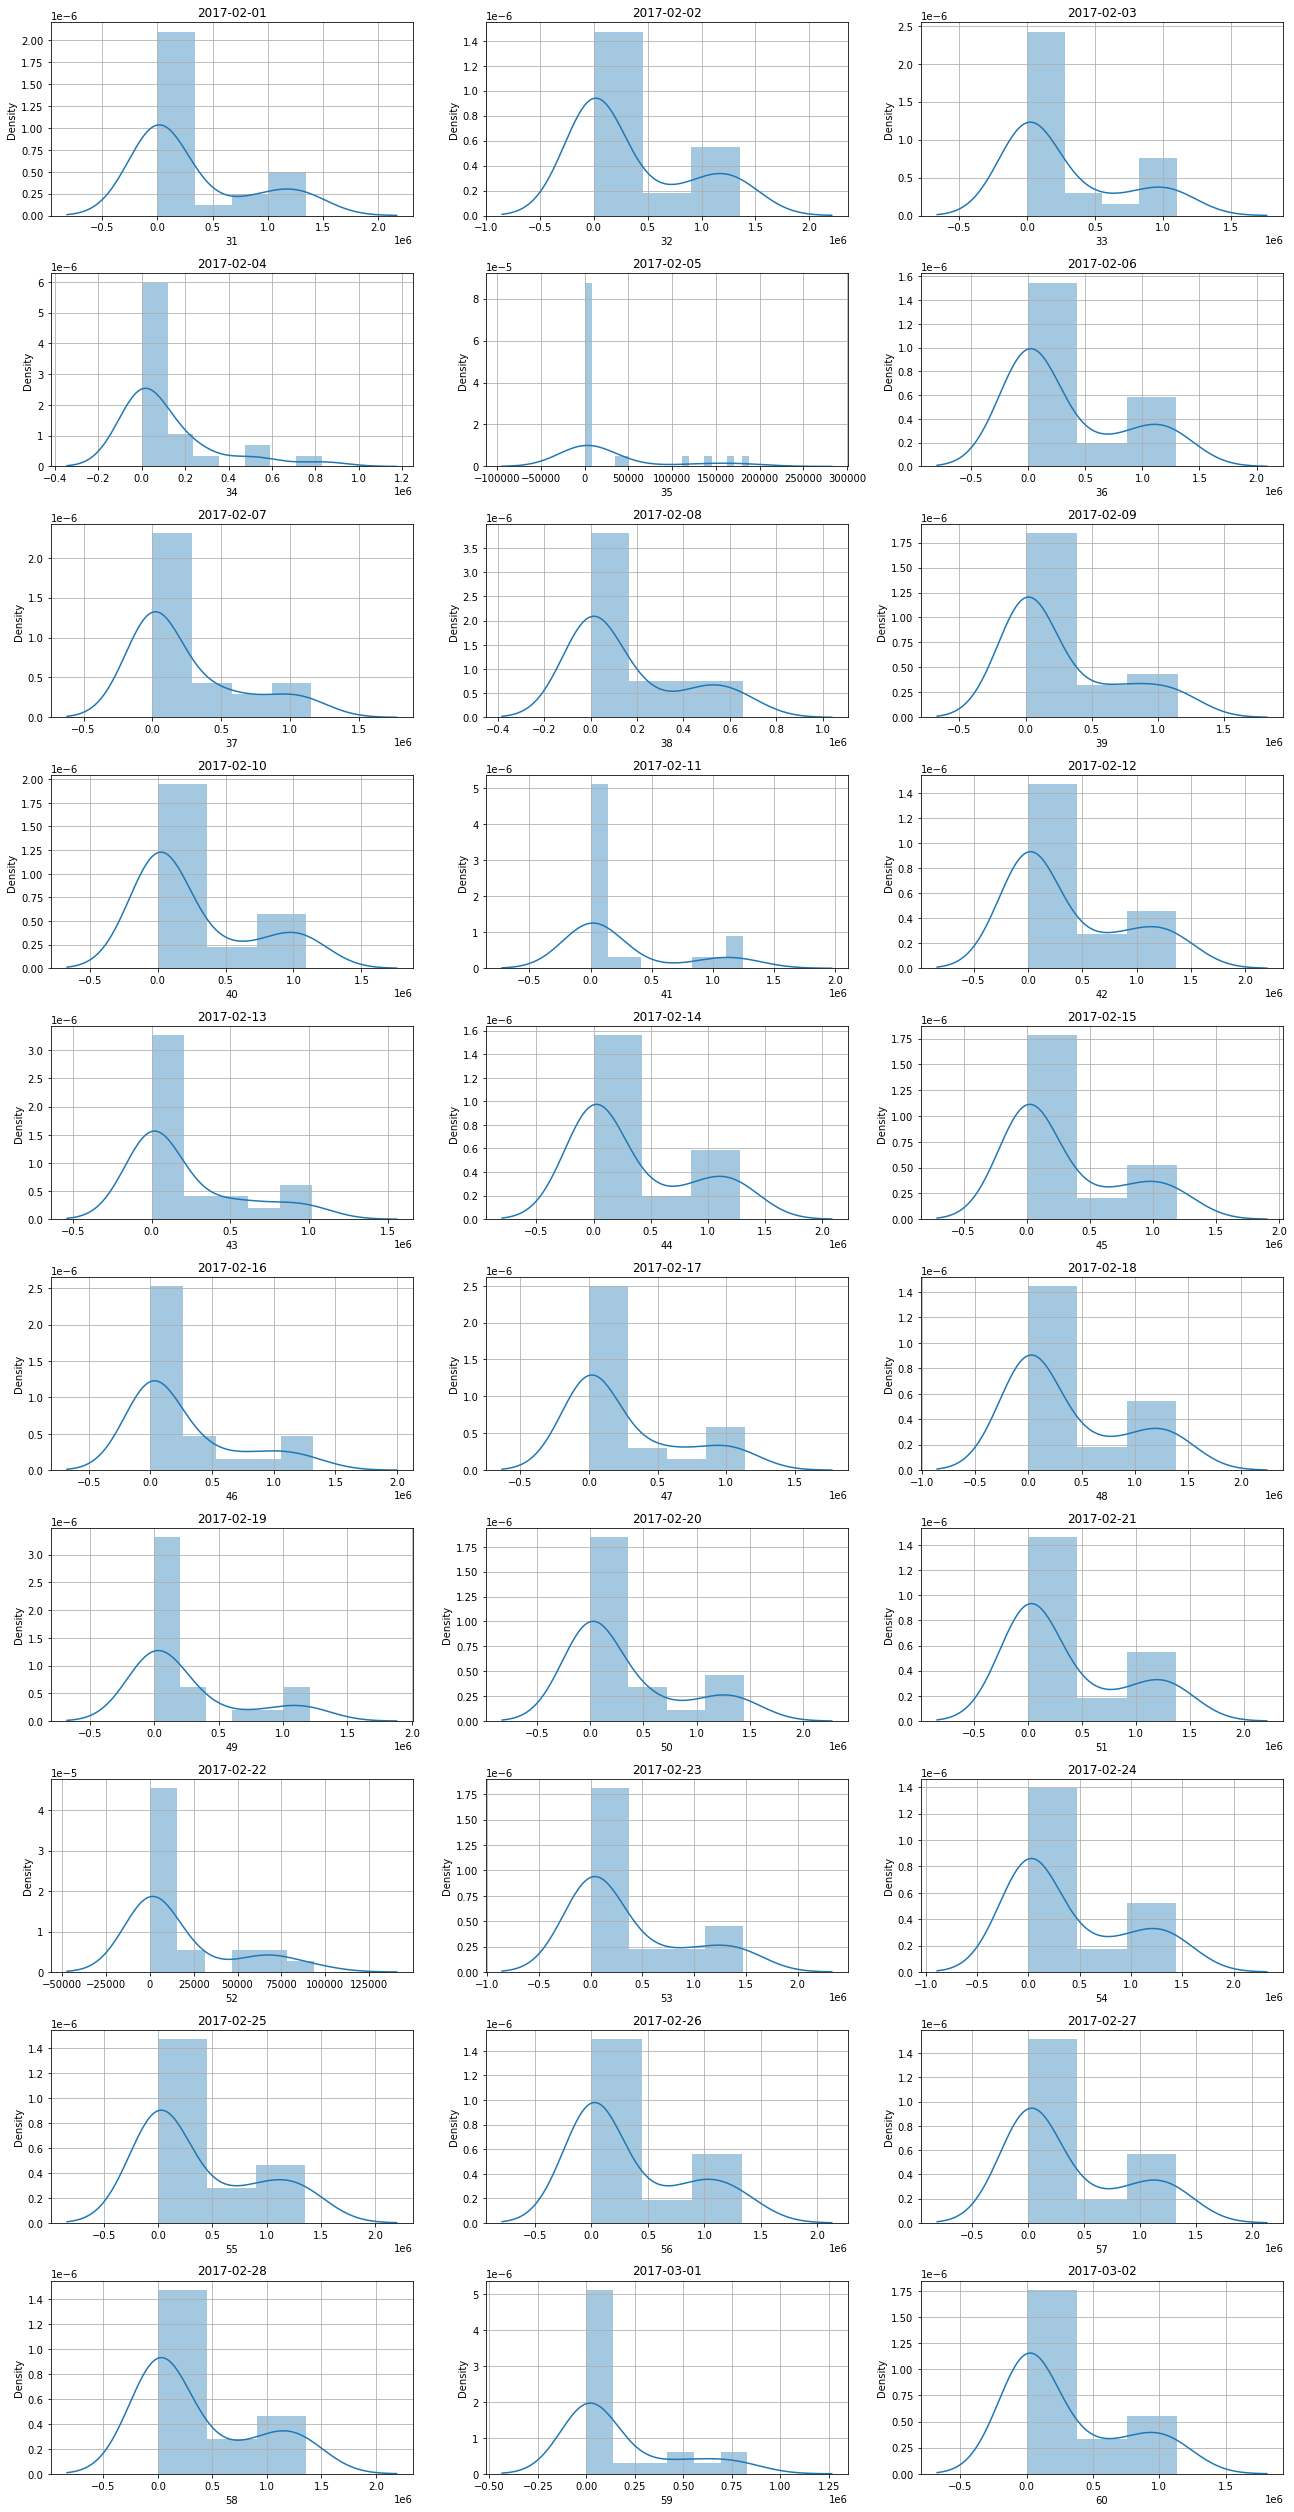

In [51]:
plt.figure(figsize=(18, 35))

for i in range(31,61):
    plt.subplot(10, 3, i-30)
    sns.distplot(dataset1.iloc[i,3:])
    plt.title(dataset1.iloc[i,1])
    plt.grid(True)

plt.tight_layout()
plt.show()